<a href="https://colab.research.google.com/github/Neucielle/DesafioIndicium/blob/main/LH_CD_NeucielleQuadros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Desafio Cientista de Dados**

1. Você foi alocado(a) em um time da Indicium que está trabalhando atualmente junto a um cliente no processo de criação de uma plataforma de aluguéis temporários na cidade de Nova York. Para o desenvolvimento de sua estratégia de precificação, pediu para que a Indicium fizesse uma análise exploratória dos dados de seu maior concorrente, assim como um teste de validação de um modelo preditivo.

2. O objetivo é desenvolver um modelo de previsão de preços a partir do dataset oferecido, e avaliar tal modelo utilizando as métricas de avaliação que mais fazem sentido para o problema.


### **Dicionário**

1. **id** – Atua como uma chave exclusiva para cada anúncio nos dados do aplicativo
2. **nome** - Representa o nome do anúncio
3. **host_id** - Representa o id do usuário que hospedou o anúncio
4. **host_name** – Contém o nome do usuário que hospedou o anúncio
5. **bairro_group** - Contém o nome do bairro onde o anúncio está localizado
6. **bairro** - Contém o nome da área onde o anúncio está localizado
7. **latitude** - Contém a latitude do local
8. **longitude** - Contém a longitude do local
9. **room_type** – Contém o tipo de espaço de cada anúncio
10. **price** - Contém o preço por noite em dólares listado pelo anfitrião
11. **minimo_noites** - Contém o número mínimo de noites que o usuário deve reservar
12. **numero_de_reviews** - Contém o número de comentários dados a cada listagem
13. **ultima_review** - Contém a data da última revisão dada à listagem
14. **reviews_por_mes** - Contém o número de avaliações fornecidas por mês
15. **calculado_host_listings_count** - Contém a quantidade de listagem por host
16. **disponibilidade_365** - Contém o número de dias em que o anúncio está disponível para reserva


In [57]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import warnings
import joblib
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder

In [58]:
df = pd.read_csv('/content/drive/MyDrive/Desafio_Indicium/teste_indicium_precificacao.csv')
df.head()

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
3,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129


In [59]:
print("\nEstatísticas descritivas das variáveis numéricas:")
display(df.describe())


Estatísticas descritivas das variáveis numéricas:


,id,host_id,latitude,longitude,price,minimo_noites,numero_de_reviews,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
count,4.889400e+04,4.889400e+04,48894.000000,48894.000000,48894.000000,48894.000000,48894.000000,38842.000000,48894.000000,48894.000000
mean,1.901753e+07,6.762139e+07,40.728951,-73.952169,152.720763,7.030085,23.274758,1.373251,7.144005,112.776169
std,1.098288e+07,7.861118e+07,0.054529,0.046157,240.156625,20.510741,44.550991,1.680453,32.952855,131.618692
min,2.595000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.472371e+06,7.822737e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967743e+07,3.079553e+07,40.723075,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915225e+07,1.074344e+08,40.763117,-73.936273,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


## **Tratamentos Necessários**

In [60]:
print("\nValores nulos por coluna:")
print(df.isnull().sum())


Valores nulos por coluna:
id                                   0
nome                                16
host_id                              0
host_name                           21
bairro_group                         0
bairro                               0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimo_noites                        0
numero_de_reviews                    0
ultima_review                    10052
reviews_por_mes                  10052
calculado_host_listings_count        0
disponibilidade_365                  0
dtype: int64


In [61]:
df['price'] = df['price'].fillna(df['price'].median())
df['disponibilidade_365'] = df['disponibilidade_365'].fillna(df['disponibilidade_365'].median())
df['minimo_noites'] = df['minimo_noites'].fillna(df['minimo_noites'].median())

df['nome'] = df['nome'].fillna('Desconhecido')
df['host_name'] = df['host_name'].fillna('Desconhecido')

df['reviews_por_mes'] = df['reviews_por_mes'].fillna(df['reviews_por_mes'].median())
df['ultima_review'] = df['ultima_review'].fillna('Sem revisão')

print("\nApós tratamento, valores nulos por coluna:")
print(df.isnull().sum())



Após tratamento, valores nulos por coluna:
id                               0
nome                             0
host_id                          0
host_name                        0
bairro_group                     0
bairro                           0
latitude                         0
longitude                        0
room_type                        0
price                            0
minimo_noites                    0
numero_de_reviews                0
ultima_review                    0
reviews_por_mes                  0
calculado_host_listings_count    0
disponibilidade_365              0
dtype: int64


### Conversão de tipos de dados...

In [62]:
print("\nTipos de dados das colunas:")
print(df.dtypes)

df['bairro_group'] = df['bairro_group'].astype('category')
df['bairro'] = df['bairro'].astype('category')

print("\nApós conversão, tipos de dados das colunas:")
print(df.dtypes)


Tipos de dados das colunas:
id                                 int64
nome                              object
host_id                            int64
host_name                         object
bairro_group                      object
bairro                            object
latitude                         float64
longitude                        float64
room_type                         object
price                              int64
minimo_noites                      int64
numero_de_reviews                  int64
ultima_review                     object
reviews_por_mes                  float64
calculado_host_listings_count      int64
disponibilidade_365                int64
dtype: object

Após conversão, tipos de dados das colunas:
id                                  int64
nome                               object
host_id                             int64
host_name                          object
bairro_group                     category
bairro                           category
lati

### Tratamento de valores não numéricos em colunas numéricas:::

Verificação de ha dados numericos em colunas que não sejam numericas...

In [63]:
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df['disponibilidade_365'] = pd.to_numeric(df['disponibilidade_365'], errors='coerce')

print("\nValores nulos após conversão:")
print(df.isnull().sum())


Valores nulos após conversão:
id                               0
nome                             0
host_id                          0
host_name                        0
bairro_group                     0
bairro                           0
latitude                         0
longitude                        0
room_type                        0
price                            0
minimo_noites                    0
numero_de_reviews                0
ultima_review                    0
reviews_por_mes                  0
calculado_host_listings_count    0
disponibilidade_365              0
dtype: int64


### Identificação de Outliers

In [64]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

print("\nDistribuição de preços após remoção de outliers:")
print(df['price'].describe())


Distribuição de preços após remoção de outliers:
count    45922.000000
mean       119.969688
std         68.150755
min          0.000000
25%         65.000000
50%        100.000000
75%        159.000000
max        334.000000
Name: price, dtype: float64


### Resumo dos tratamento:::

In [65]:
print("\nResumo após o tratamento:")
print(df.info())

print("\nEstatísticas descritivas após o tratamento:")
display(df.describe())


Resumo após o tratamento:
<class 'pandas.core.frame.DataFrame'>
Index: 45922 entries, 0 to 48893
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   id                             45922 non-null  int64   
 1   nome                           45922 non-null  object  
 2   host_id                        45922 non-null  int64   
 3   host_name                      45922 non-null  object  
 4   bairro_group                   45922 non-null  category
 5   bairro                         45922 non-null  category
 6   latitude                       45922 non-null  float64 
 7   longitude                      45922 non-null  float64 
 8   room_type                      45922 non-null  object  
 9   price                          45922 non-null  int64   
 10  minimo_noites                  45922 non-null  int64   
 11  numero_de_reviews              45922 non-null  int64   
 12  ultima_rev

,id,host_id,latitude,longitude,price,minimo_noites,numero_de_reviews,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
count,4.592200e+04,4.592200e+04,45922.00000,45922.000000,45922.000000,45922.00000,45922.000000,45922.000000,45922.000000,45922.000000
mean,1.889894e+07,6.632837e+07,40.72849,-73.950733,119.969688,6.93820,23.942990,1.249055,6.639715,109.373133
std,1.091899e+07,7.755800e+07,0.05533,0.046471,68.150755,19.85802,45.315659,1.539292,31.008486,130.275350
min,2.595000e+03,2.438000e+03,40.49979,-74.244420,0.000000,1.00000,0.000000,0.010000,1.000000,0.000000
25%,9.436504e+06,7.727013e+06,40.68924,-73.981928,65.000000,1.00000,1.000000,0.270000,1.000000,0.000000
50%,1.952614e+07,3.028375e+07,40.72177,-73.954365,100.000000,2.00000,5.000000,0.720000,1.000000,39.000000
75%,2.891267e+07,1.055072e+08,40.76339,-73.934313,159.000000,5.00000,24.000000,1.620000,2.000000,217.000000
max,3.648724e+07,2.743213e+08,40.91306,-73.712990,334.000000,1250.00000,629.000000,58.500000,327.000000,365.000000


### Distribuição de preços:::

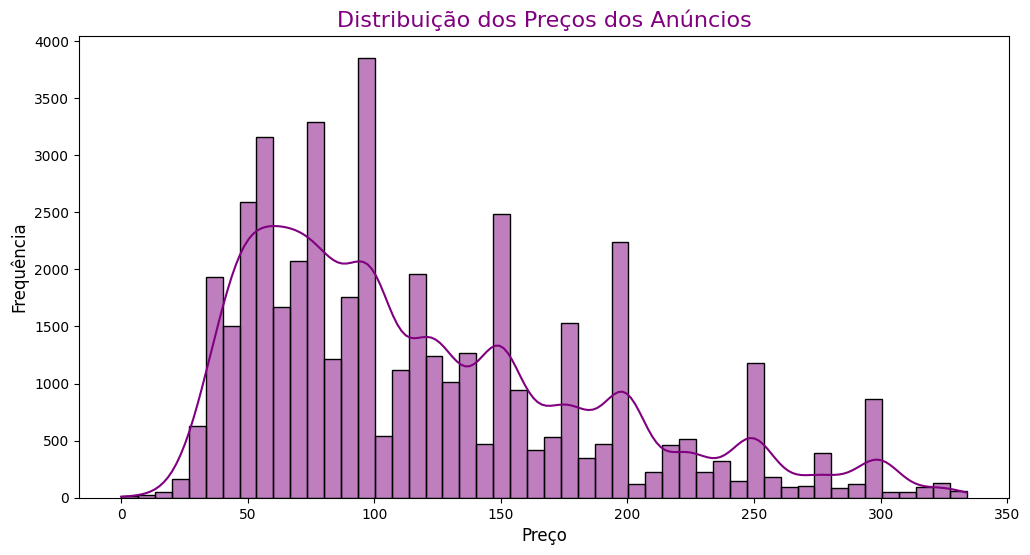

In [66]:
plt.figure(figsize=(12, 6))
sns.histplot(df['price'], bins=50, kde=True, color='purple')
plt.title('Distribuição dos Preços dos Anúncios', fontsize=16, color='purple')
plt.xlabel('Preço', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.show()

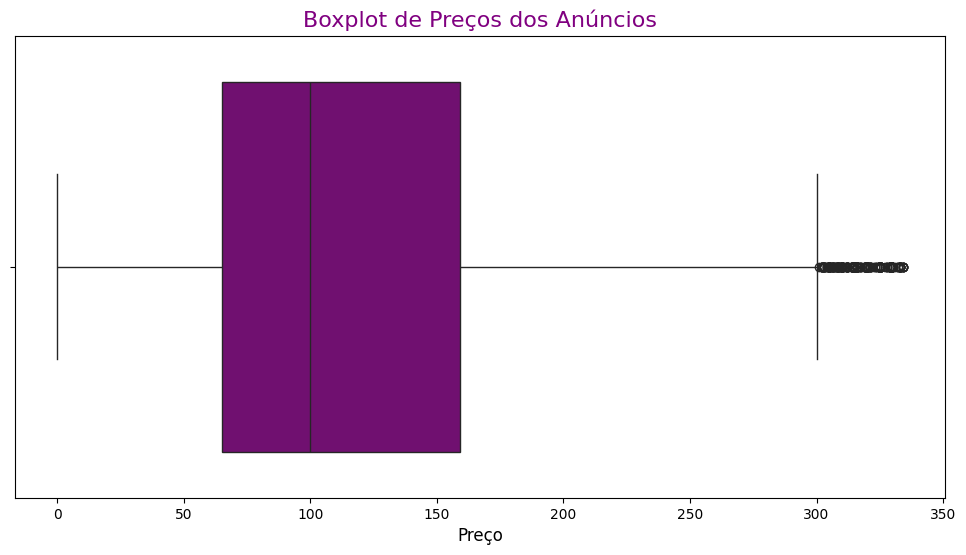

In [67]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['price'], color='purple')
plt.title('Boxplot de Preços dos Anúncios', fontsize=16, color='purple')
plt.xlabel('Preço', fontsize=12)
plt.show()

### Preços por bairros:::

In [68]:
bairro_group_means = df.groupby('bairro_group', observed=True)['price'].mean().sort_values(ascending=True)

print("\nPreços médios por bairros:")
display(bairro_group_means)



Preços médios por bairros:


,price
bairro_group,
Bronx,77.365421
Queens,88.904437
Staten Island,89.235616
Brooklyn,105.697383
Manhattan,145.952835


<ipython-input-69-f297a4e1badc>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bairro_group_means.index, y=bairro_group_means.values, palette='Set2', hue=None, legend=False)


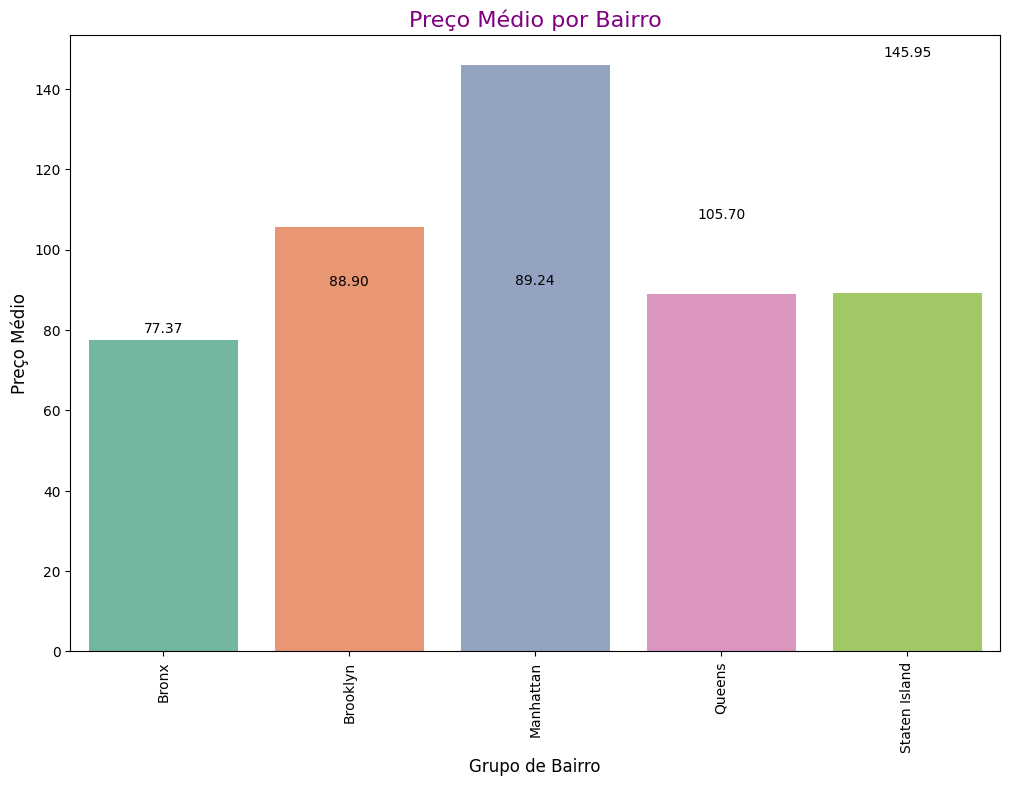

In [69]:
plt.figure(figsize=(12, 8))
sns.barplot(x=bairro_group_means.index, y=bairro_group_means.values, palette='Set2', hue=None, legend=False)
plt.title('Preço Médio por Bairro', fontsize=16, color='purple')
plt.xlabel('Grupo de Bairro', fontsize=12)
plt.ylabel('Preço Médio', fontsize=12)
plt.xticks(rotation=90)

for i, value in enumerate(bairro_group_means.values):
    plt.text(i, value + 2, f"{value:.2f}", ha='center', fontsize=10, color='black')

plt.show()


### Analisando as palavras mais comuns.

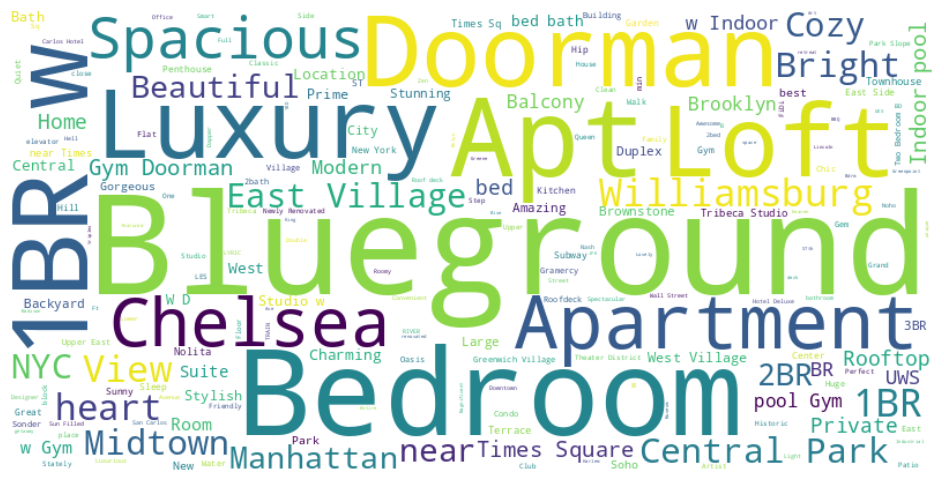

In [70]:
from wordcloud import WordCloud


luxury_listings = df[df['price'] > 300]


text = ' '.join(luxury_listings['nome'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)


plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


1. Onde seria mais indicada a compra para investimento?

In [71]:
bairro_group_means = (
    df.groupby('bairro_group', observed=True)['price']
    .mean()
    .sort_values(ascending=False)
)

<ipython-input-72-1bc44b869018>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


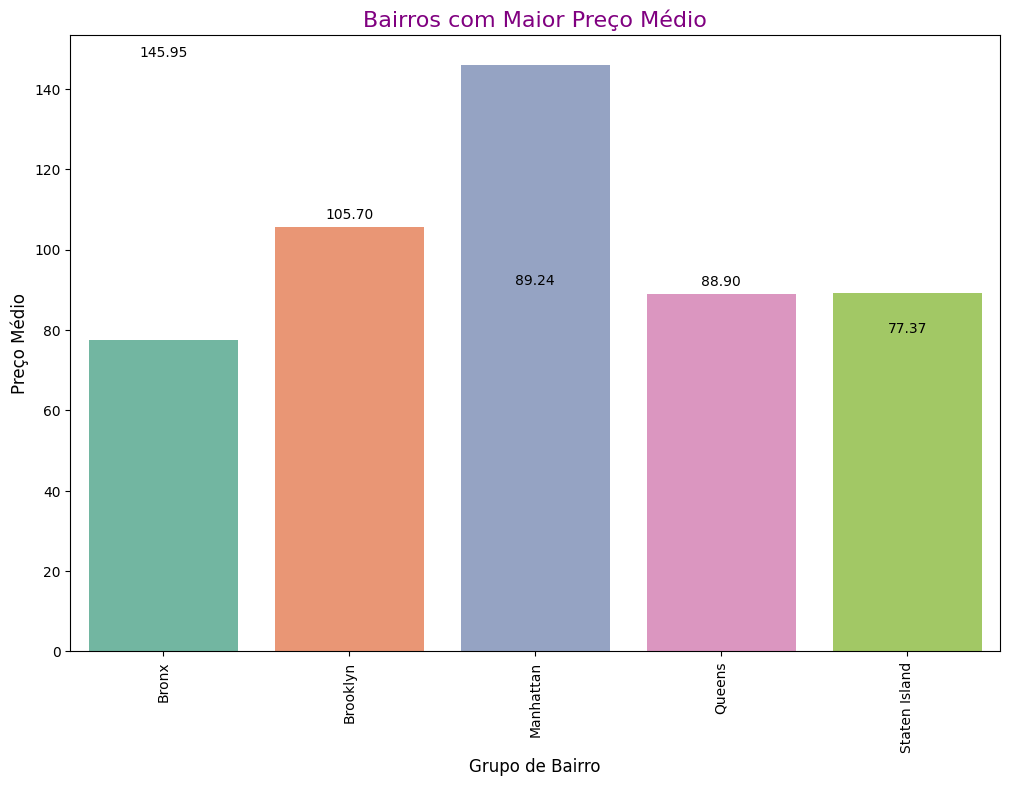

In [72]:
plt.figure(figsize=(12, 8))
sns.barplot(
    x=bairro_group_means.index,
    y=bairro_group_means.values,
    palette='Set2',
    legend=False
)
plt.title('Bairros com Maior Preço Médio', fontsize=16, color='purple')
plt.xlabel('Grupo de Bairro', fontsize=12)
plt.ylabel('Preço Médio', fontsize=12)
plt.xticks(rotation=90)

for i, value in enumerate(bairro_group_means.values):
    plt.text(i, value + 2, f"{value:.2f}", ha='center', fontsize=10, color='black')

plt.show()


2. O número mínimo de noites e a disponibilidade ao longo do ano interferem no preço?

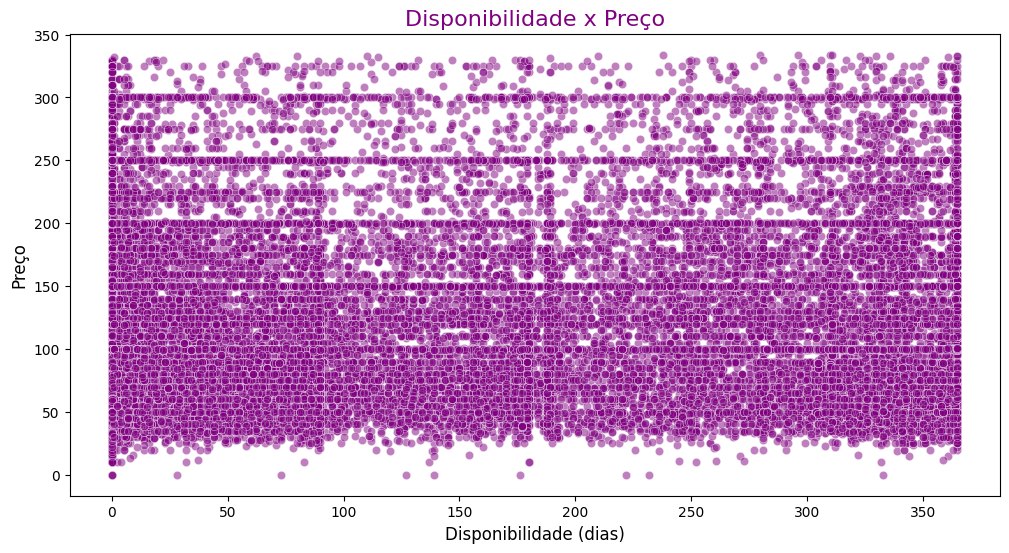

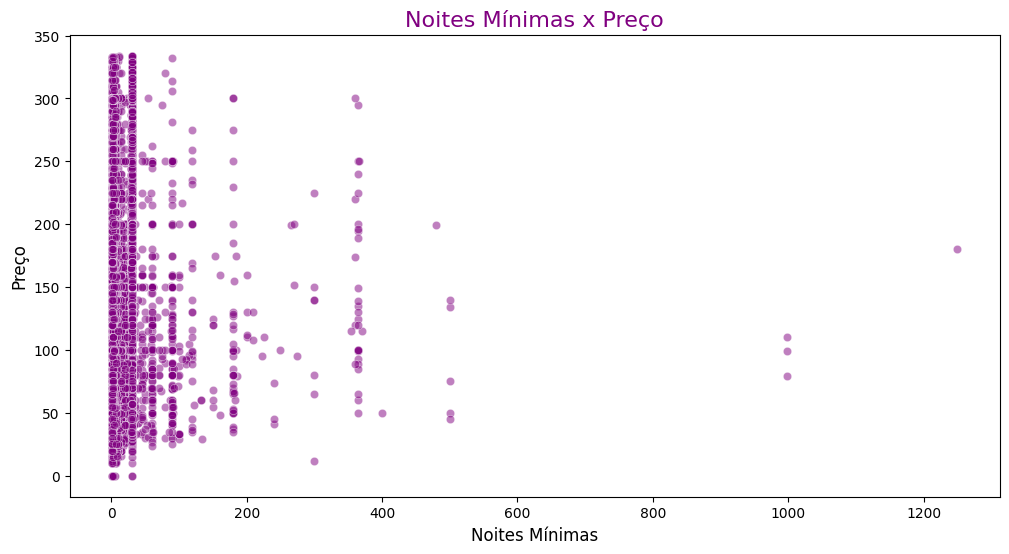

In [73]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='disponibilidade_365', y='price', data=df, alpha=0.5, color='purple')
plt.title('Disponibilidade x Preço', fontsize=16, color='purple')
plt.xlabel('Disponibilidade (dias)', fontsize=12)
plt.ylabel('Preço', fontsize=12)
plt.show()


plt.figure(figsize=(12, 6))
sns.scatterplot(x='minimo_noites', y='price', data=df, alpha=0.5, color='purple')
plt.title('Noites Mínimas x Preço', fontsize=16, color='purple')
plt.xlabel('Noites Mínimas', fontsize=12)
plt.ylabel('Preço', fontsize=12)
plt.show()


3. Existe algum padrão no texto do nome do local para lugares de mais alto valor?

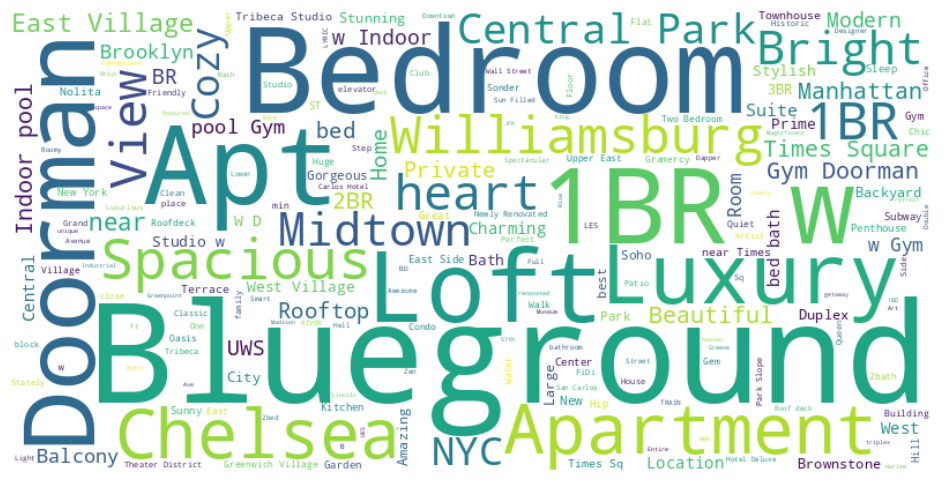

In [74]:
luxury_listings = df[df['price'] > 300]

text = ' '.join(luxury_listings['nome'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


### performance do modelo:::

In [75]:
warnings.filterwarnings("ignore", category=UserWarning, module='sklearn')


data = {
    'bairro_group': ['Manhattan', 'Brooklyn', 'Queens'],
    'room_type': ['Entire home/apt', 'Private room', 'Entire home/apt'],
    'minimo_noites': [1, 2, 3],
    'numero_de_reviews': [45, 10, 25],
    'disponibilidade_365': [355, 300, 180],
    'price': [200, 100, 150]
}

X = df[['bairro_group', 'room_type', 'minimo_noites', 'numero_de_reviews', 'disponibilidade_365']]
y = df['price']


preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), ['bairro_group', 'room_type']),
        ('num', 'passthrough', ['minimo_noites', 'numero_de_reviews', 'disponibilidade_365'])
    ]
)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor())
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline.fit(X_train, y_train)


apartamento = {
    'bairro_group': ['Manhattan'],
    'room_type': ['Entire home/apt'],
    'minimo_noites': [1],
    'numero_de_reviews': [45],
    'disponibilidade_365': [355]
}

apartamento_df = pd.DataFrame(apartamento)

previsao_price = pipeline.predict(apartamento_df)

print(f'Preço sugerido para o apartamento: R${previsao_price[0]:.2f}')


Preço sugerido para o apartamento: R$216.58


In [80]:
import pickle

# Salvar o modelo com pickle
with open('/content/drive/MyDrive/LH_CD_NeucielleQuadros.pkl', 'wb') as f:
    pickle.dump(model, f)